<div style="text-align: center">
  <h1 style="font-size: 48px;">Wine Quality Project</h1>
</div>
    
<div style="text-align: center"> <h2>Classification Model<h2>
</div>

## Contents : 

1. [Exploratory Analysis](#1-Exploratory-Analysis) 

   1.1. [Wine Quality and Physiochemical Properties](#11-wine-quality-and-physiochemical-properties)
   
   1.2. [Distribution of Variables](#12-distribution-of-variables)
   
   1.3. [Outliers](#13-Outliers)
   
   
2. [Feature Engineer and Data Preprocessing](#2-feature-engineer-and-data-preprocessing)

    2.1. [Dealing With Outliers](##21-Dealing-With-Outliers)
    
    2.2. [Distribution Transformation](##22-Distribution-Transformation)
    
    2.3. [Dealing With Imbalance Data](##23-Dealing-With-Imbalanced-Data)
    
    2.4. [Encoding Categorical Data](##34-Encoding-Categorical-Data)
    
    2.5. [Splitting the Data into Train Set and Test Set](##35-Splitting-the-Data-into-Train-Set-and-Test-Set)
    
    2.6. [Feature Scaling](##26-Feature-Scaling)
    

3. [Machine Learning](#3-Machine-Learning)

    3.1.[Model Building](##31-Model-Building)
        
      3.3.1.[Logistic Regression](###311-Logistic-Regression)
      
      3.3.2.[K-NN(K-Nearest Neighbors)](###312-K-NN)
      
      3.3.3.[SVM (Support Vector Machine)](###313-SVM(Support-Vector-Machine))
      
      3.3.4. [Kernel SVM](###314-Kernel-SVM)
     
      3.3.5. [Naive Bayes](###315-Naive-Bayes)
        
      3.3.6. [Decision Tree](###316-Decision-Tree)
      
      3.3.7. [Random Forest](###317-Random-Forest)
      
     3.2. [Hyperparameters Tunning](##32-Hyperparameters-Tunning)
      
      3.2.1. [Grid Search](###321-Grid-Search)
      
     4.[Conclusions](#4-Conclusions)
       

## Overview

The aim of this project is to develop a classification predictive model for wine quality using its physiochemical properties. Wine quality is influenced by various factors, such as alcohol content, pH levels, acidity, residual sugar, and more. However, alcohol content is known to have the highest correlation with wine quality.

To achieve the project goal, a random forest model was built using a dataset of wine samples with their respective physiochemical properties and quality ratings. The model achieved an accuracy of 94.21%, indicating that it can predict wine quality with high accuracy.

This model can have practical applications in the wine industry, where winemakers can use it to predict the quality of their wines based on their physiochemical properties. Additionally, it can also help consumers to make informed decisions when purchasing wines based on their quality predictions. However, it is important to note that the model's performance should be validated on new, unseen data to ensure its generalizability.

## The Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

For more information, read [Cortez et al., 2009].

In [1]:
import pandas as pd

In [2]:
dataset =pd.read_csv("winequality-red.csv")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


__Variables:__

Independent variables or X (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Dependent variable or y (based on sensory data):

12 - quality (score between 0 (worst quality) and 10 (best quality))

# 1. Exploratory Analisis

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
from skimpy import skim

In [7]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1599   │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0      ┃ p25   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ fixed acidity              │   0 │      0 │     8.3 │      1.7 │     4.6 │   7.1 │   9.2 │    16 │  ▁█▄▂   │  │
│ │ volatile acidity           │   0 │      0 │    0.53 │     0.18 │    0.12 │  0.39 │  0.64 │   1.6 │  ▃█▄▁   │  │
│ │ citric acid                │   0 │      0 │    0.27 │     0.19 │       0 │  0.09 │  0.42 │     1 │  █▇▆▃   │  │
│ │ residual sugar             │   0 │      0 │     2.5 │      1.4 │     0.9 │   1.9 │   2.6 │    16 │   █▁    │  │
│ │ chlorides                  │   0 │      0 │   0.087 │    0.047 │   0.012 │  0.07 │  0.09 │  0.61 │   █▁    │  │
│ │ free sulfur dioxide        │   0 │      0 │      16 │       10 │       1 │     7 │    21 │    72 │  █▆▃▁   │  │
│ │ total sulfur dioxide       │   0 │      0 │      46 │       33 │       6 │    22 │    62 │   290 │   █▃▁   │  │
│ │ density                    │   0 │      0 │       1 │   0.0019 │    0.99 │     1 │     1 │     1 │   ▂█▇▂  │  │
│ │ pH                         │   0 │      0 │     3.3 │     0.15 │     2.7 │   3.2 │   3.4 │     4 │   ▂█▅▁  │  │
│ │ sulphates                  │   0 │      0 │    0.66 │     0.17 │    0.33 │  0.55 │  0.73 │     2 │   ██▁   │  │
│ │ alcohol                    │   0 │      0 │      10 │      1.1 │     8.4 │   9.5 │    11 │    15 │  ▃█▄▂▁  │  │
│ │ quality                    │   0 │      0 │     5.6 │     0.81 │       3 │     5 │     6 │     8 │   ▁█▇▂  │  │
│ └────────────────────────────┴─────┴────────┴─────────┴──────────┴─────────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

As we can see above wee don´t have NaN values and it appears that some variables like volatile acidity,density, alchool and quality folows a normal distribution. However, let us explore this topic in greater detail at a later time

## 1.1. Wine Quality and Physiochemical Properties

__Wine Quality__

So, after reading the Red Wine Quality dataset description we got that;

quality > 6,5 ---- "good"

quality < 6 ---- "bad"

In [8]:
dataset["quality"].nunique()

6

In [9]:
dataset["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
#Let´s create other column with values from "quality" column
dataset["final quality"] = dataset["quality"].apply(lambda x: "good" if x>6.5 else "bad")

In [11]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,final quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [12]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

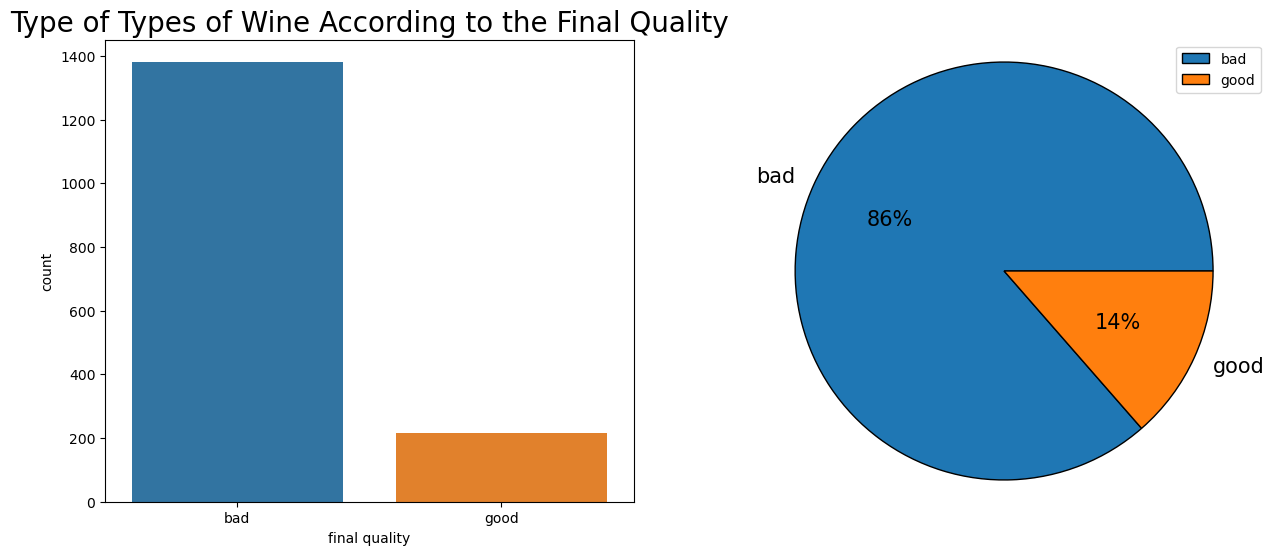

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot = sns.countplot(x="final quality", data=dataset)
plt.title("Type of Types of Wine According to the Final Quality",fontsize=20)


plt.subplot(1,2,2)
plt.pie(dataset["final quality"].value_counts().values, 
        labels = list(dataset["final quality"].value_counts().index),  
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15},
        autopct='%1.0f%%',
        )
plt.axis("equal")
plt.legend()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Wine Quality')

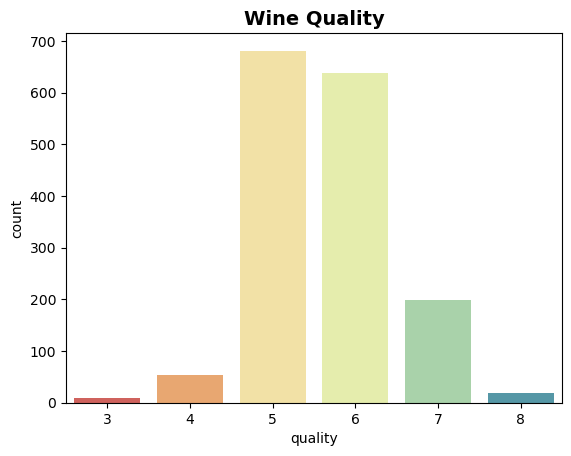

In [16]:
sns.countplot(x="quality",data=dataset, palette=sns.color_palette("Spectral"))
plt.title("Wine Quality", fontweight="bold", fontsize=14)

The number of ratings for wine quality 5 and 6 are the highets ratings.

__Physiochemical Properties by Final Quality Rating__

In [17]:
dataset.groupby("final quality").agg(["mean", "std"])

fixed acidity           volatile acidity           citric acid  \
                       mean       std             mean       std        mean   
final quality                                                                  
bad                8.236831  1.682726         0.547022  0.176337    0.254407   
good               8.847005  1.999977         0.405530  0.144963    0.376498   

                        residual sugar           chlorides            ...  \
                    std           mean       std      mean       std  ...   
final quality                                                         ...   
bad            0.189665       2.512120  1.415778  0.089281  0.049113  ...   
good           0.194438       2.708756  1.363026  0.075912  0.028480  ...   

                density                  pH           sulphates            \
                   mean       std      mean       std      mean       std   
final quality                                                               
bad            0.996859  0.001808  3.314616  0.154135  0.644754  0.170629   
good           0.996030  0.002201  3.288802  0.154478  0.743456  0.134038   

                 alcohol             quality            
                    mean       std      mean       std  
final quality                                           
bad            10.251037  0.969664  5.408828  0.601719  
good           11.518049  0.998153  7.082949  0.276443  

[2 rows x 24 columns]

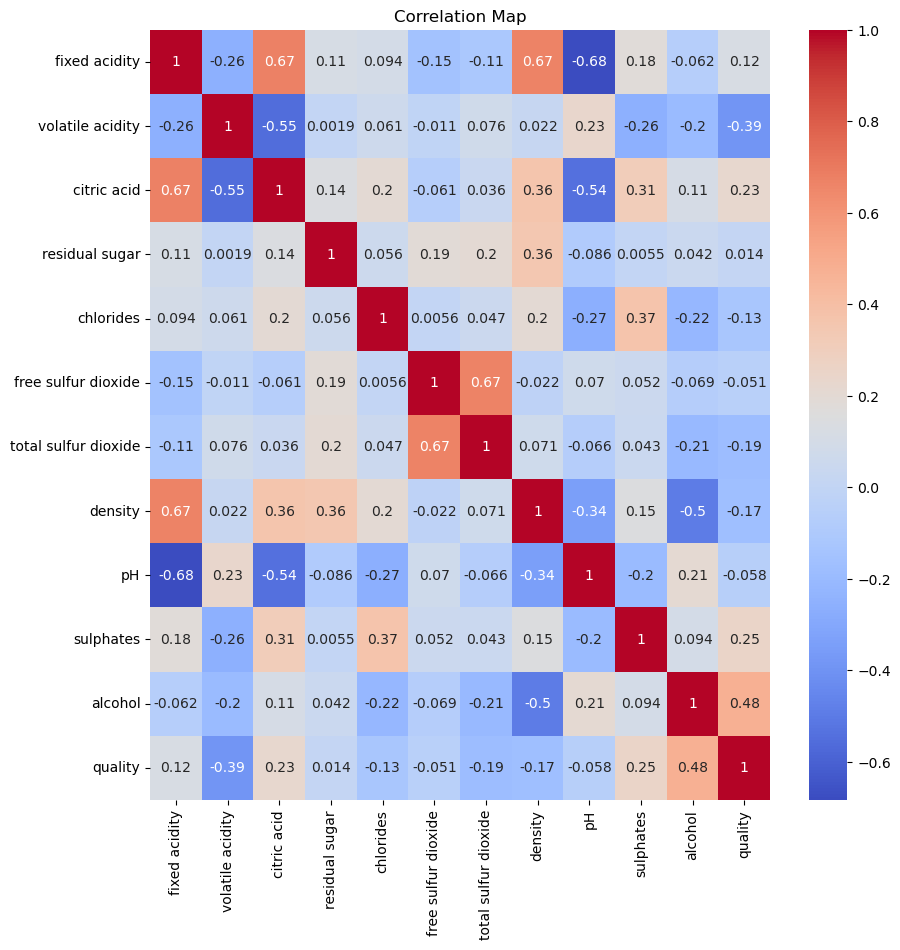

In [18]:
# Correlation
corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap="coolwarm")
plt.title("Correlation Map")
plt.show()

The above figure refrers to the correlation between all the variales. This is a statistical measure that indicates the degree to which two or more variables are related to each other. It is a measure of the linear relationship between two variables, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation.

In other words, the correlation between two variables describes the strength and direction of their relationship. If two variables have a positive correlation, it means that they tend to increase or decrease together. If they have a negative correlation, it means that as one variable increases, the other variable tends to decrease, and vice versa. A correlation of 0 indicates that there is no relationship between the two variables.

Scale of Correlation Coeficient:

0<=r<=0.19---Very Low Correlation

0.2<=r<=0.59---Low Correlation

0.4<=r<=0.59 Moderate Correlation

0.6<=r<=0.79---High Correlation

0.8<=r<=1.0---Very High Correlation

Analysing the correlatiom map, we have observed that the alcohol level in wine shows the highest correlation with the quality variable. 

## 1.2. Distribution of Variables

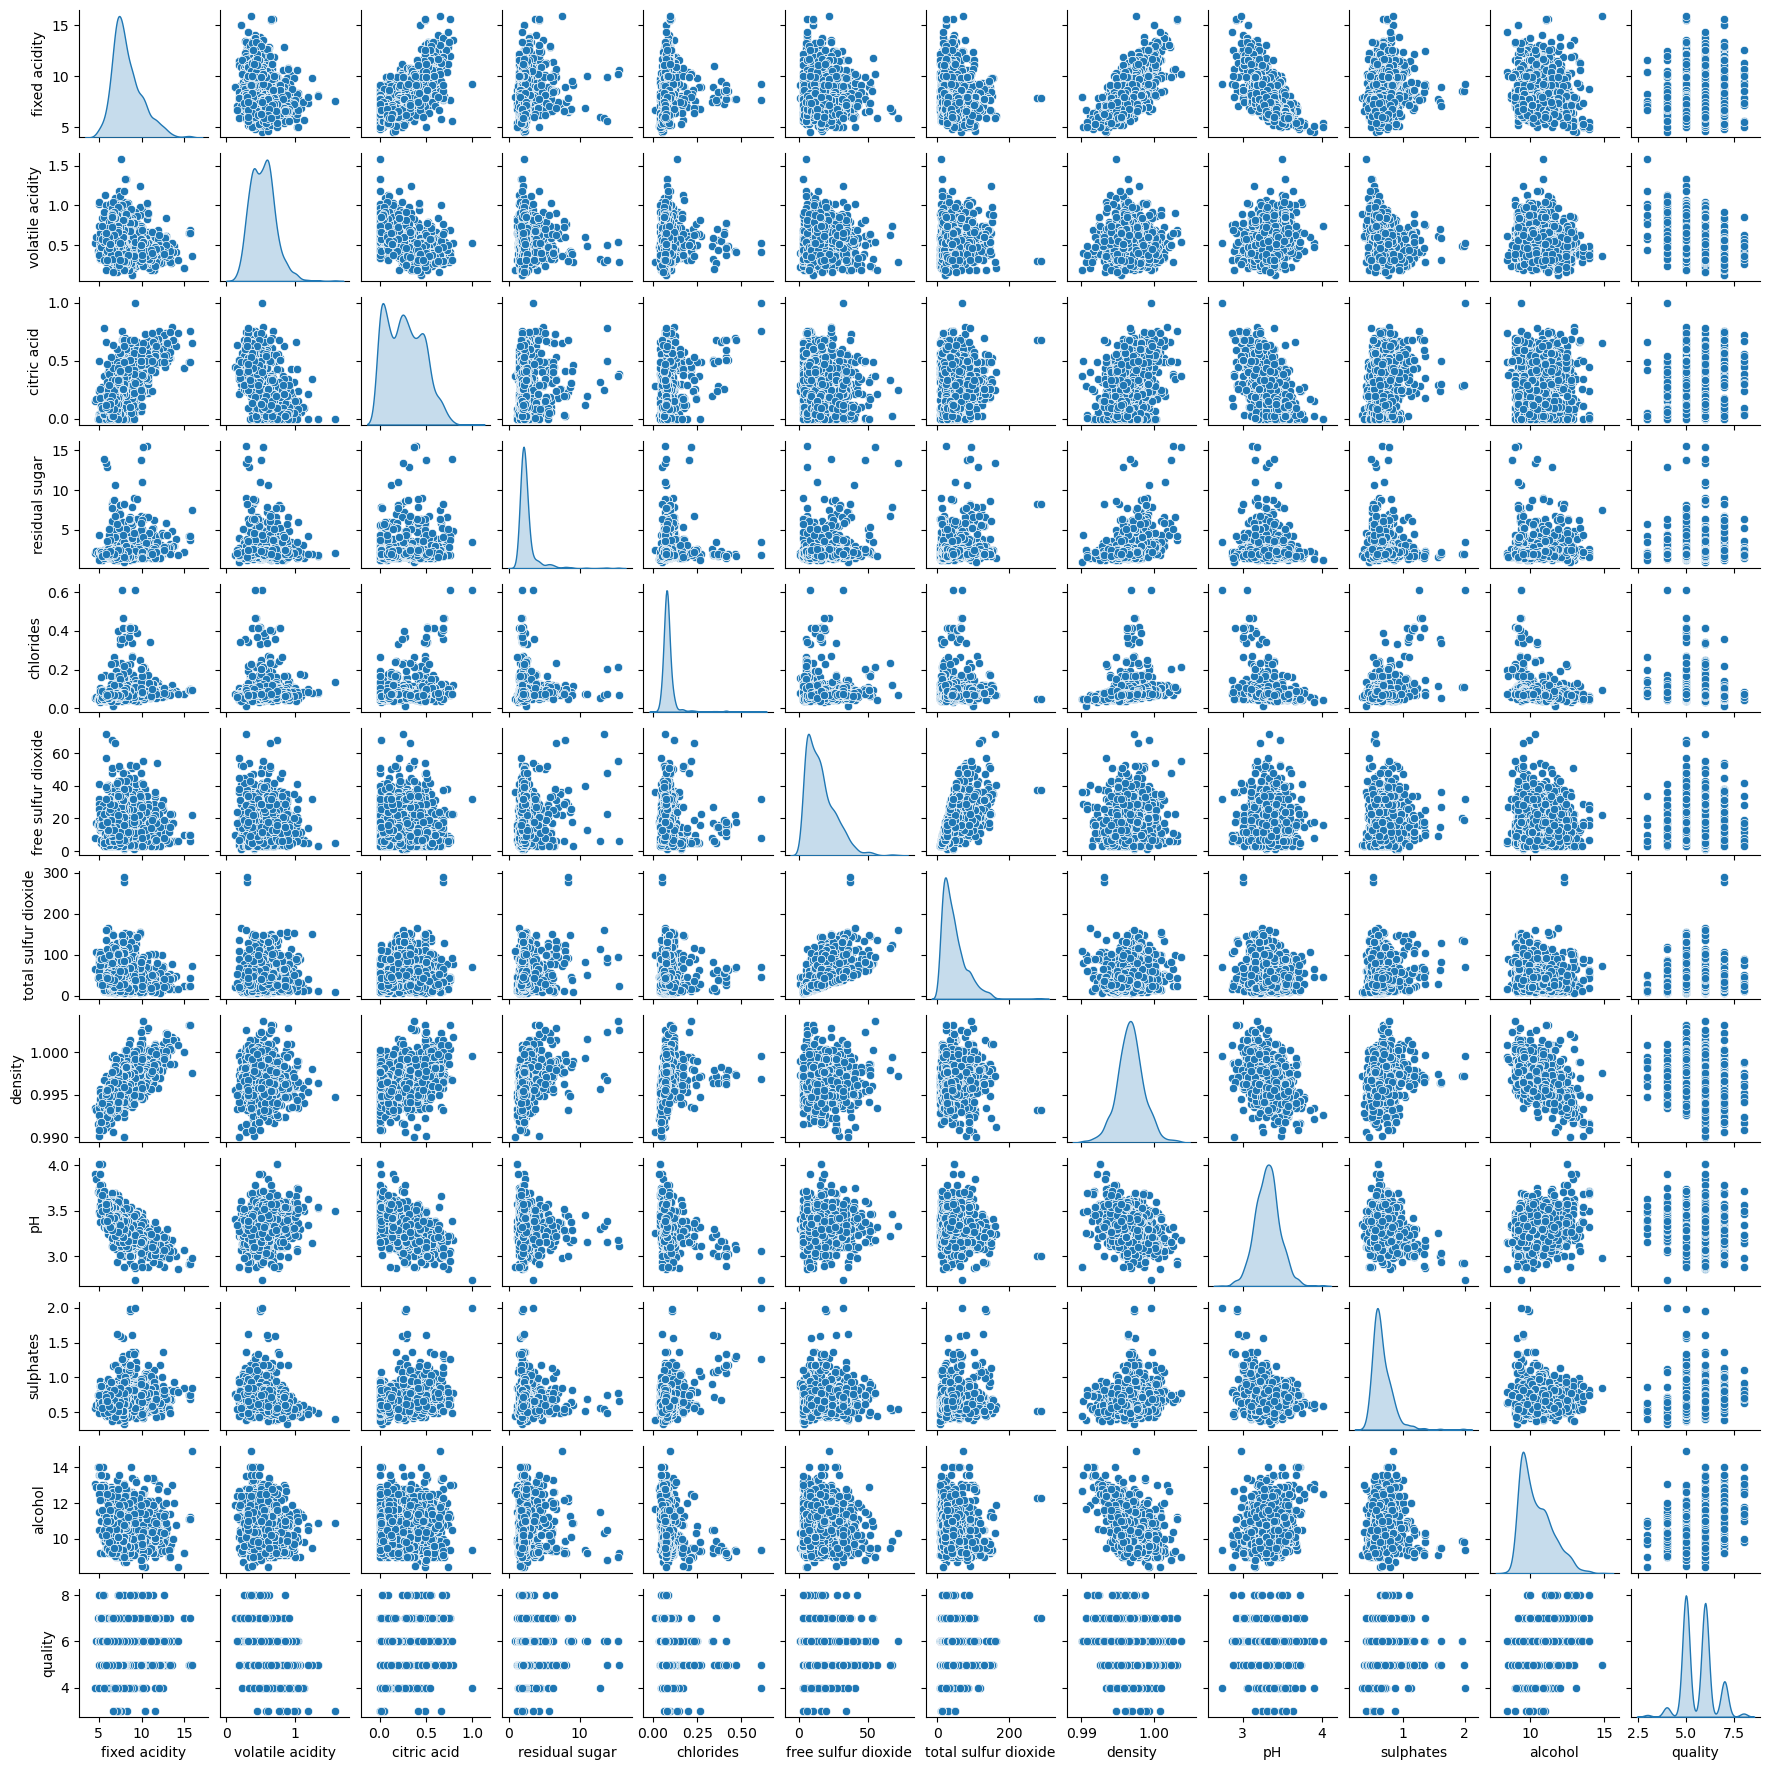

In [19]:
sns.pairplot(dataset, height=1.5,diag_kind = 'kde')
plt.show()

In [20]:
# Remove warnings messages
import warnings
warnings.filterwarnings("ignore")

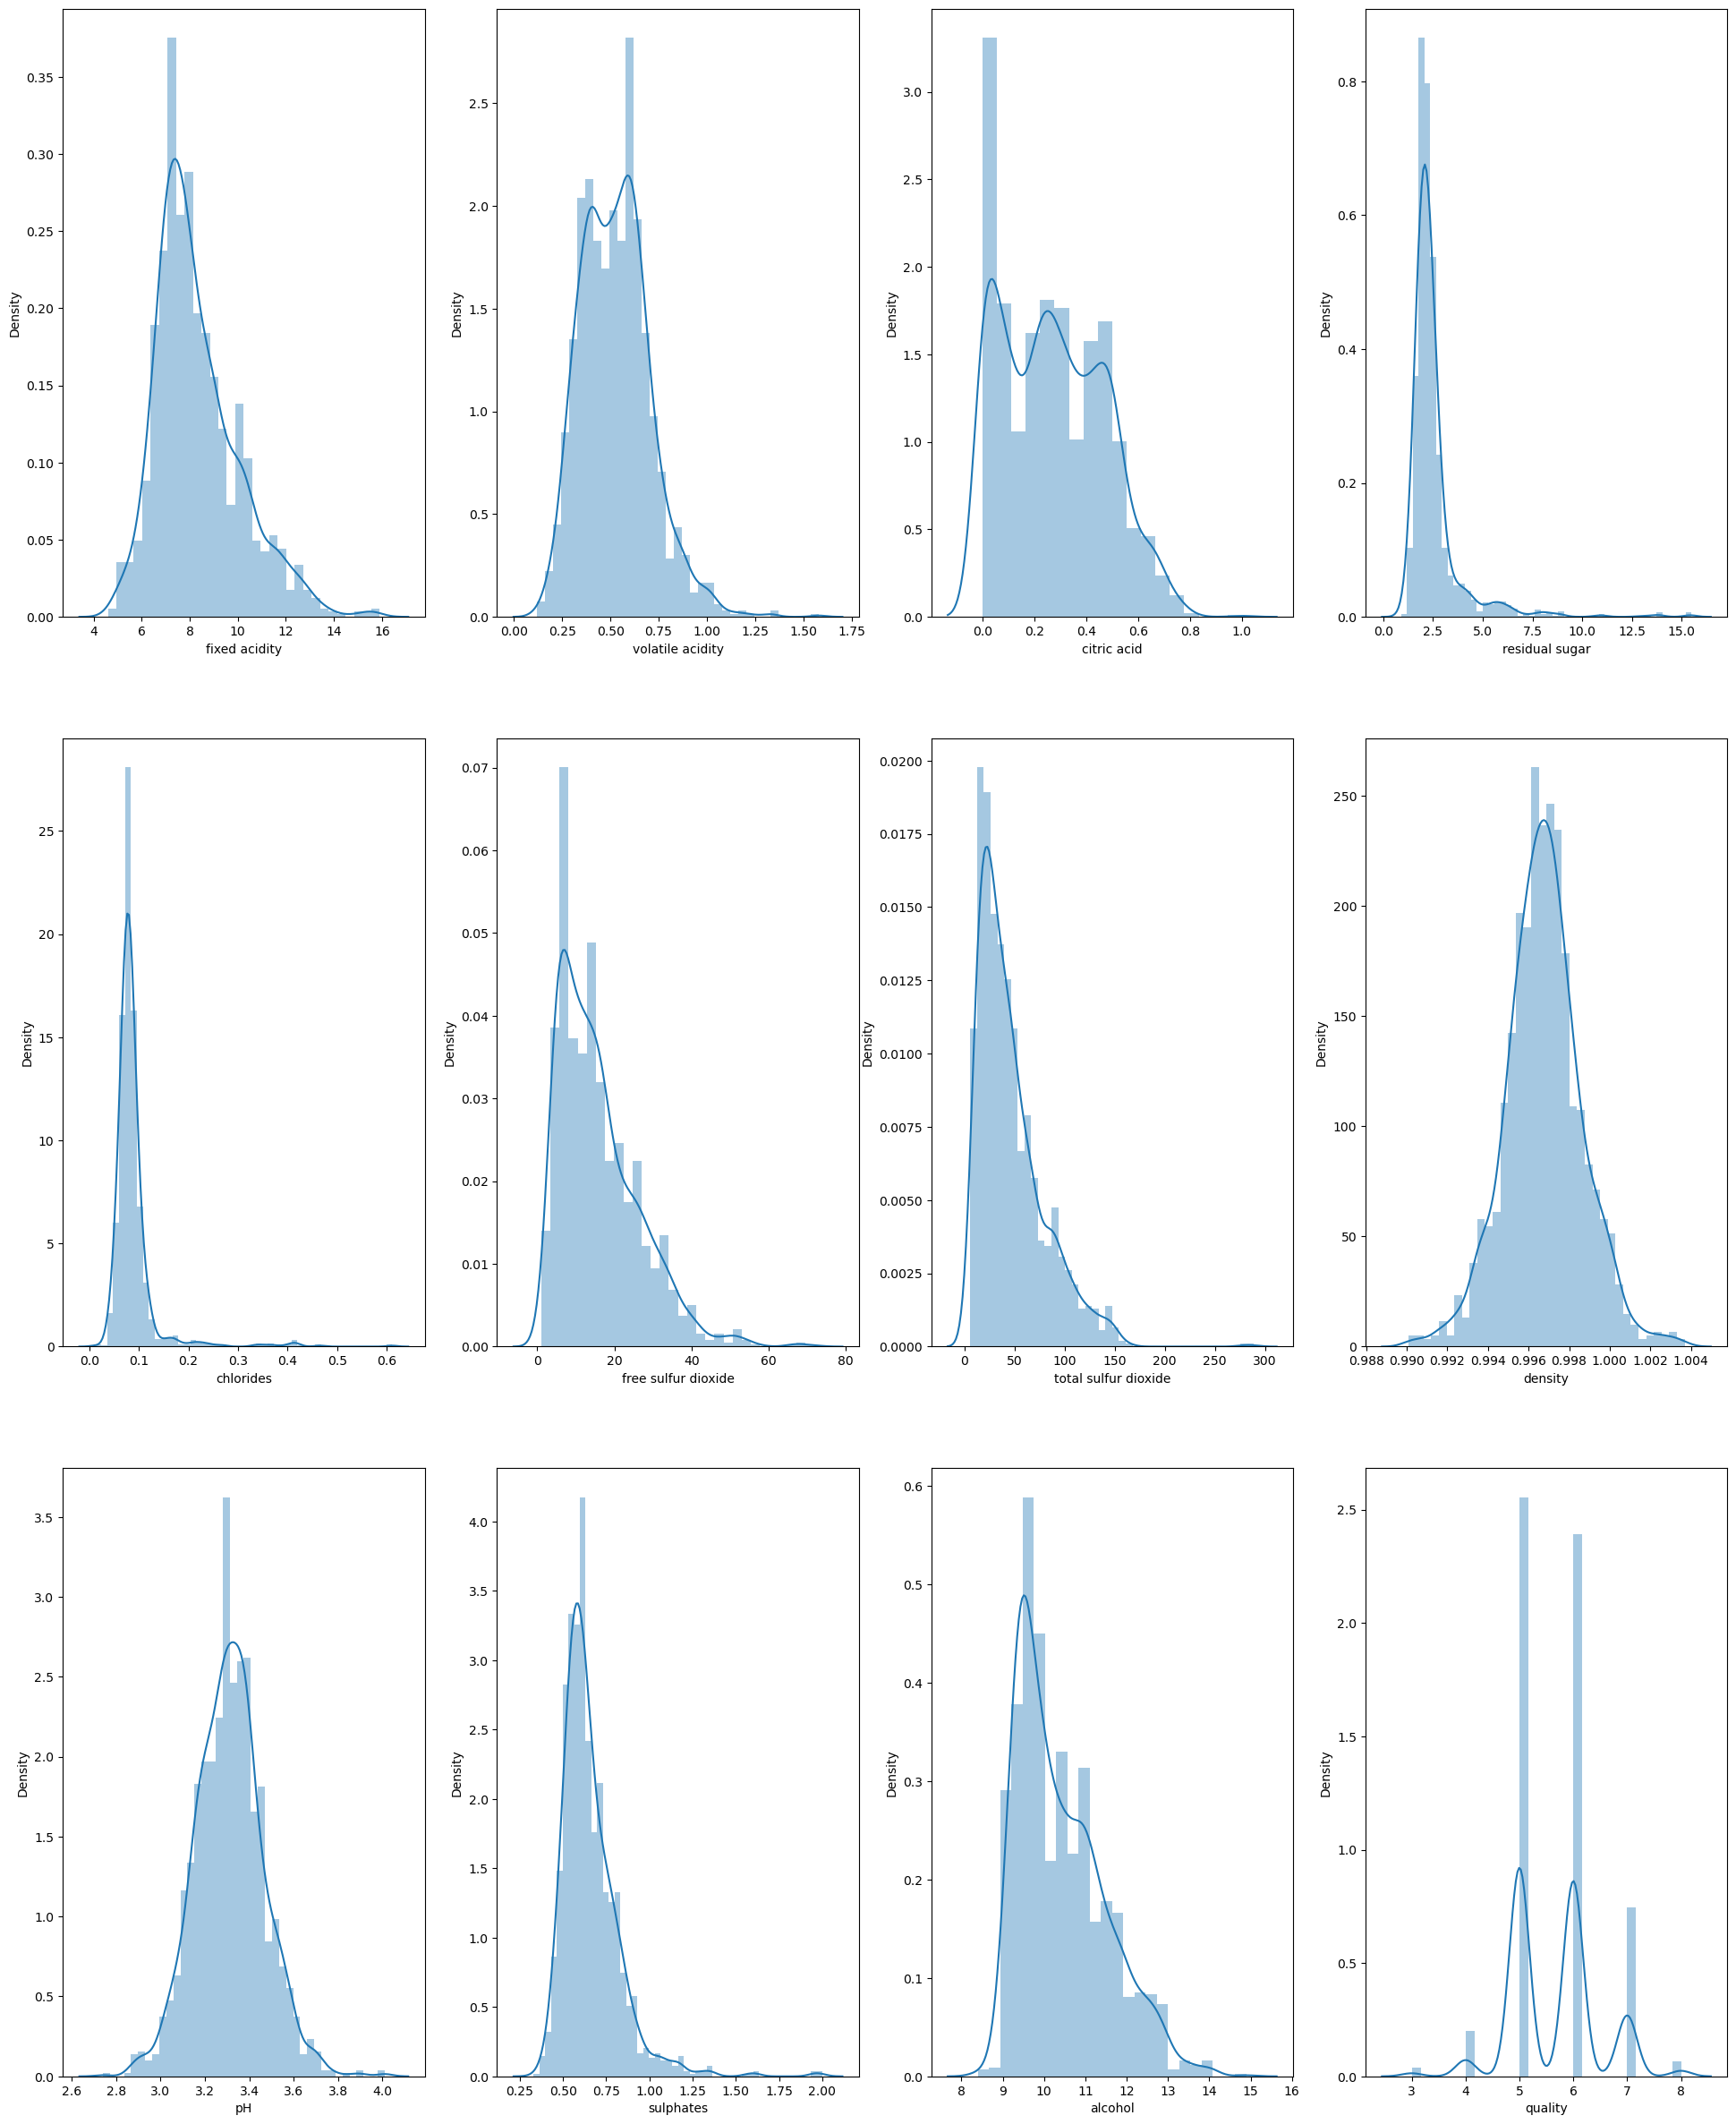

In [21]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(dataset.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

Residual Sugar, Cholorides,Free Sulfur Dioxide,Total Sulfur Dioxide and  Sulphates doesn´t follow a normal distributio, so later we have to transform it. 

## 1.3. Outliers

Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.let’s take an example to check what happens to a data set with and data set without outliers

CAUSE FOR OUTLIERS
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

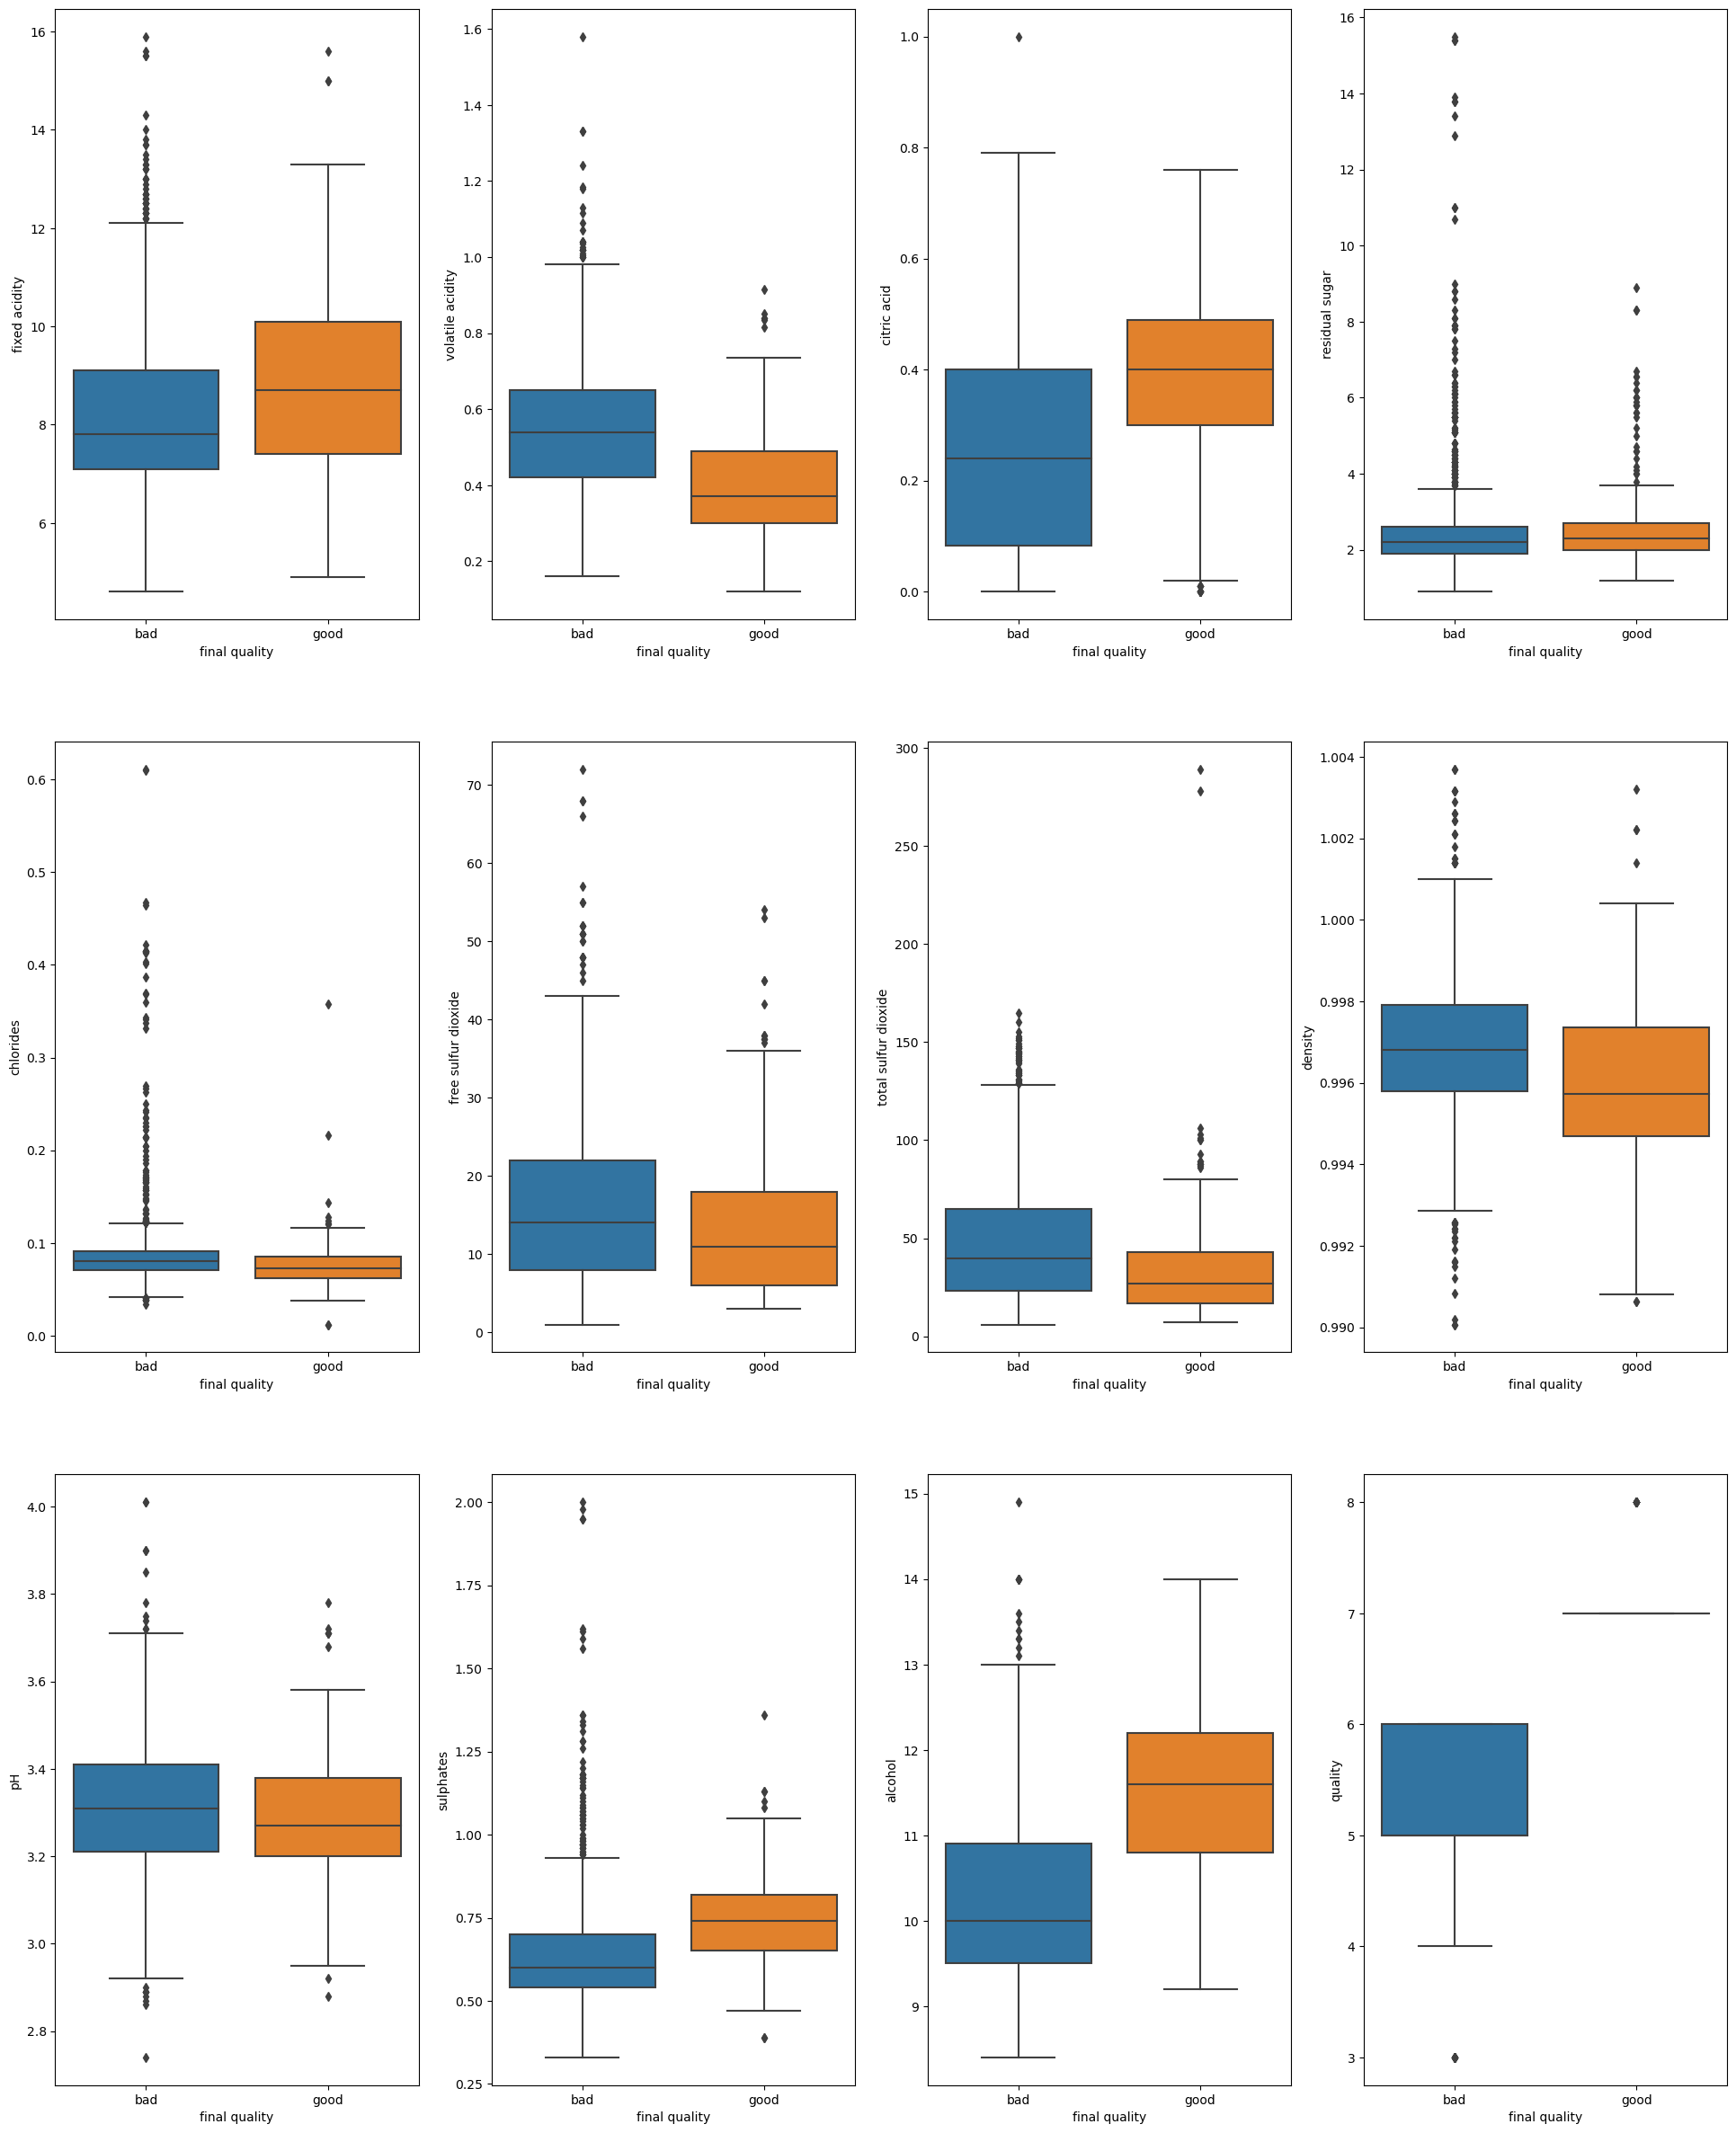

In [22]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(dataset.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(dataset["final quality"],dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

As we can see in the above figure there are some outliers that in need to remove

# 2. Feature Engineer and Data Preprocessing

## 2.1. Dealing With Outliers

To deal with outliers we can use varios methods like Z-score Method and Inter Quartile Range Method.
Both Z-score and interquartile range (IQR) methods are used to identife outliers.

> Z-score method involves calculating the standard score (Z-score) for each data point in a dataset, which is the number of standard deviations that a data point is away from the mean. A data point with a Z-score greater than a certain threshold, typically 2 or 3, is considered an outlier. This method assumes that the data is normally distributed, and may not be effective for datasets with non-normal distributions.

> IQR method involves calculating the interquartile range, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the dataset. Any data point that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR is considered an outlier. This method is more robust to outliers than the Z-score method, and can be used for datasets with non-normal distributions.

In [23]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,final quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


### 2.1.1. IQR Method

Let´s remove first the outliers for each variable without see each category, giving the lower limit and upper limit to the outliers values

In [24]:
import numpy as np

In [25]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'final quality'],
      dtype='object')

In [26]:
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

In [27]:
 for i in columns:
    q3, q1 =np.percentile(dataset[i], [75,25])
    iqr = q3 - q1
    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)
    dataset.loc[ (dataset[i]>upper_limit) , i] = upper_limit
    dataset.loc[ (dataset[i]<lower_limit), i] = lower_limit

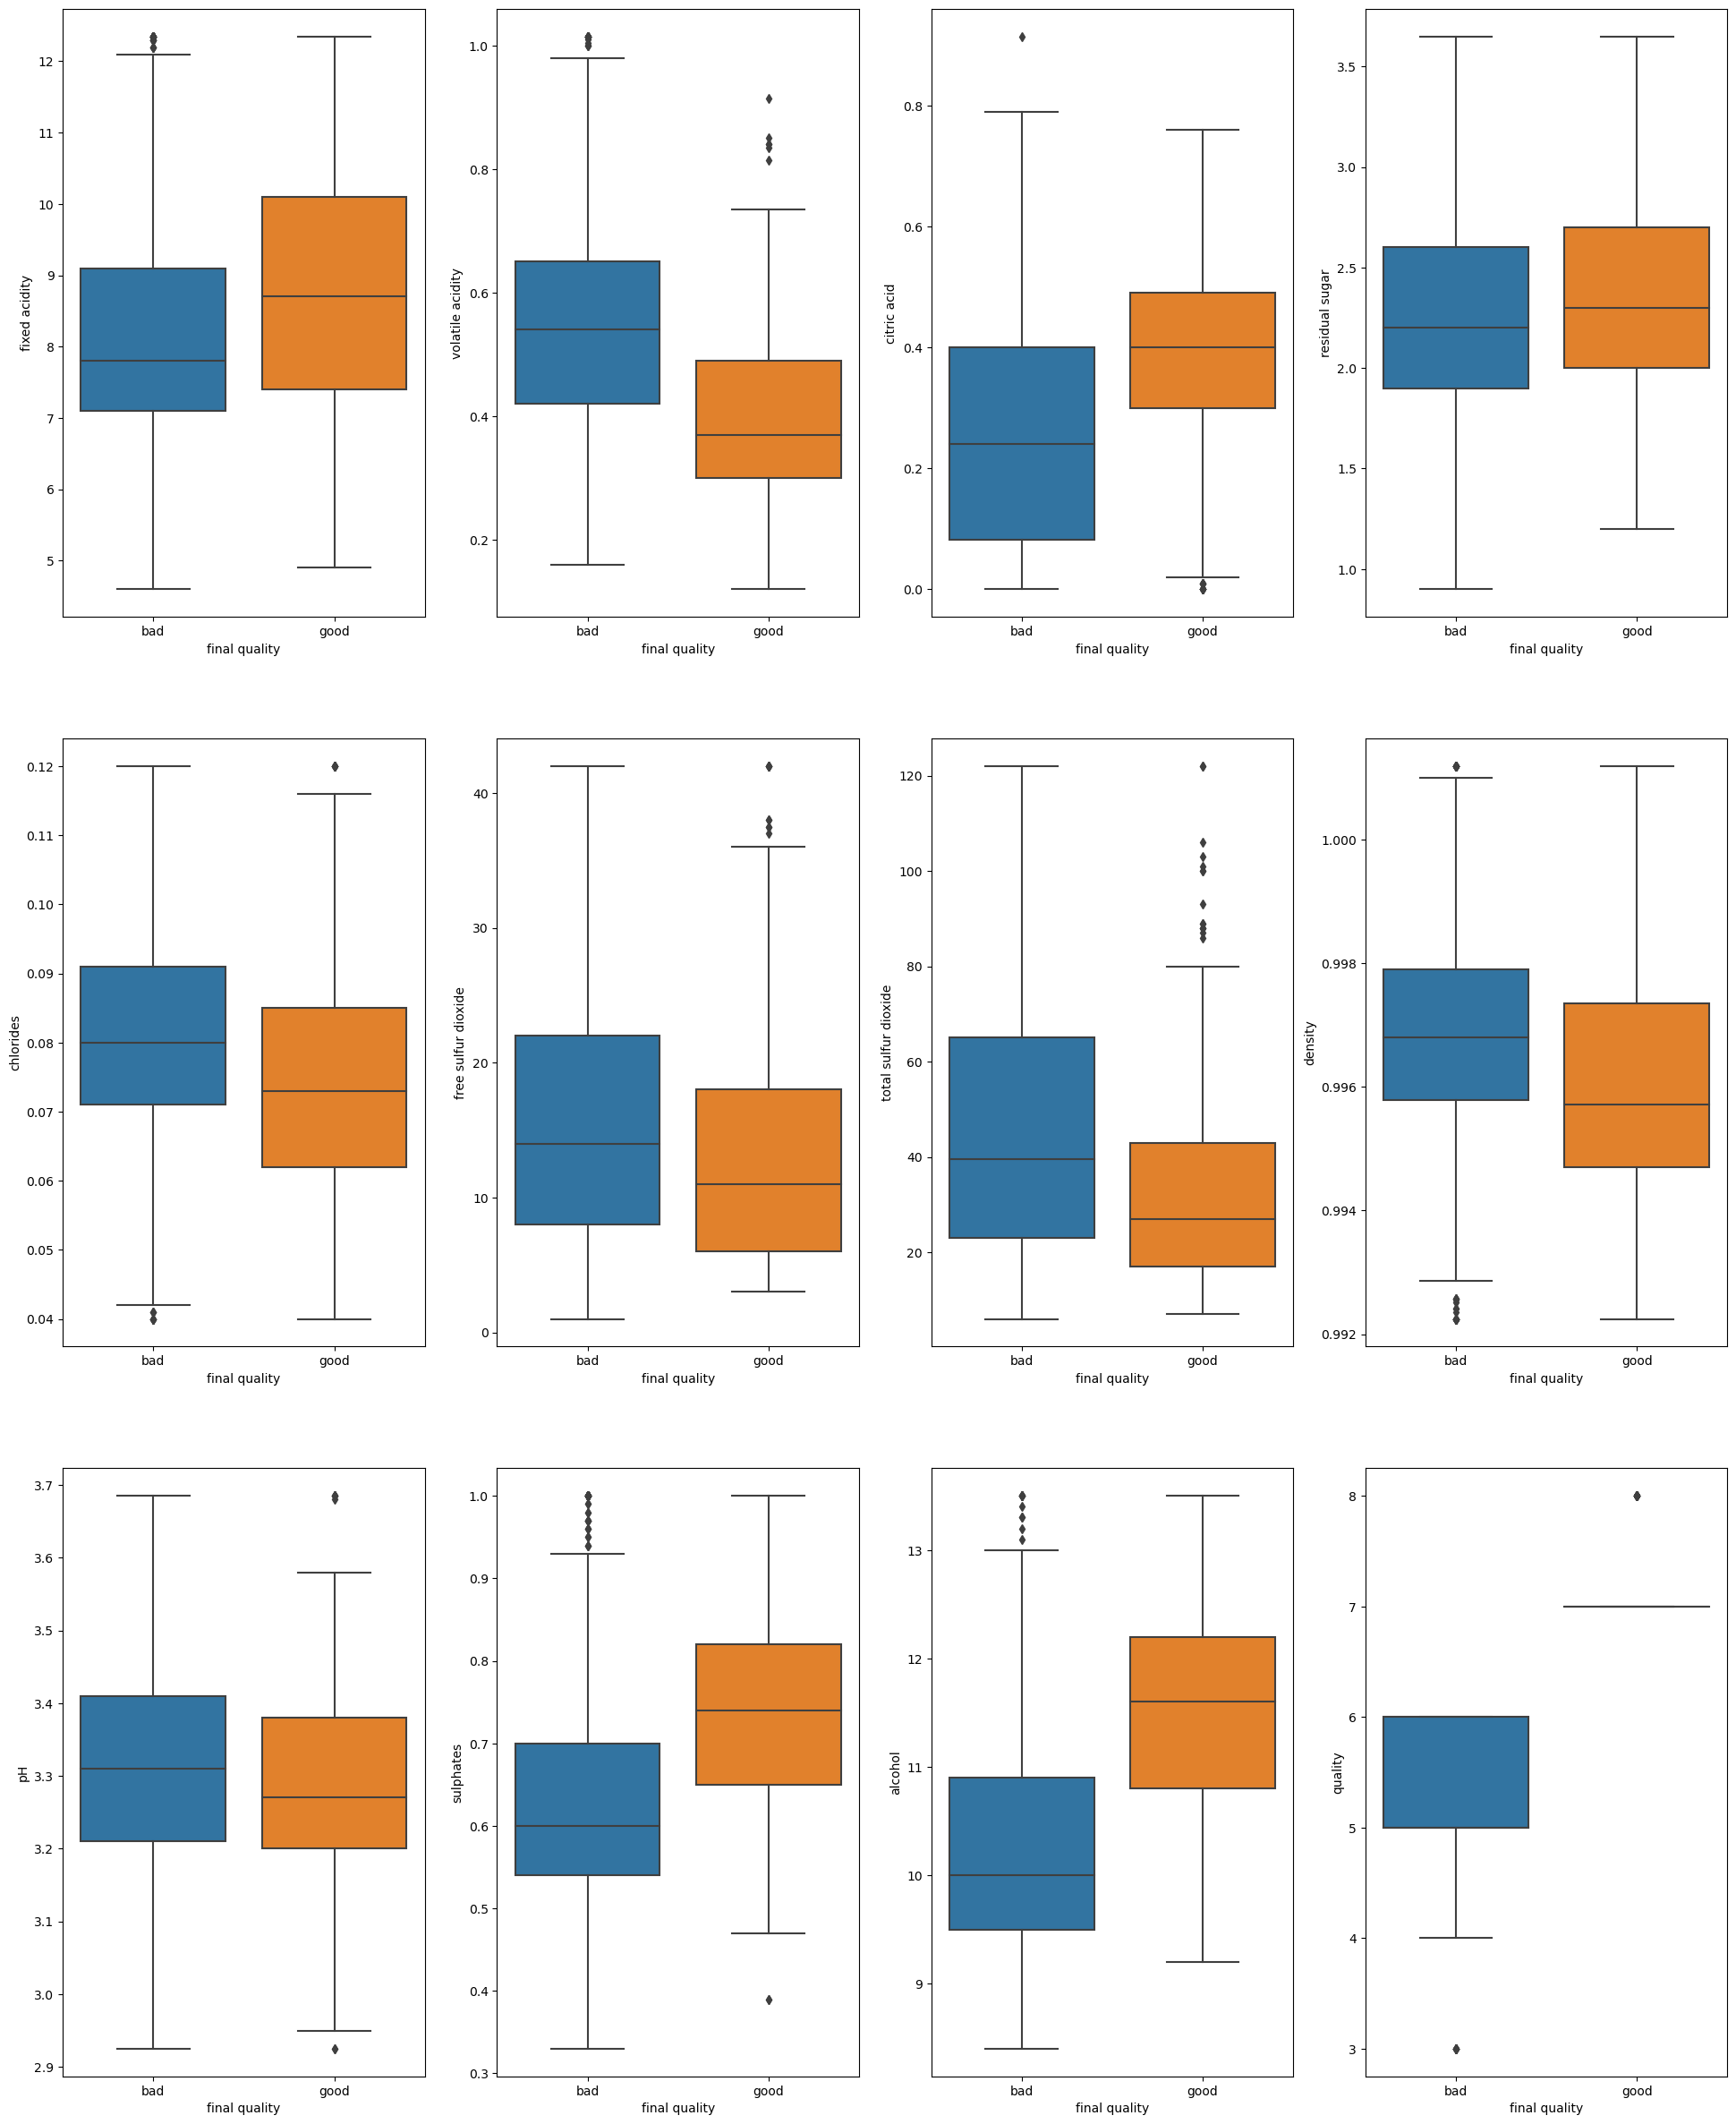

In [28]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(dataset.columns)
for i in range(3):
    for j in range(4):
            sns.boxplot(dataset["final quality"],dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

We still have some outliers but let´s see the permonace of our model´s

## 2.2. Distribution Transformation

Let's check if the distribution has changed after removing some outliers.

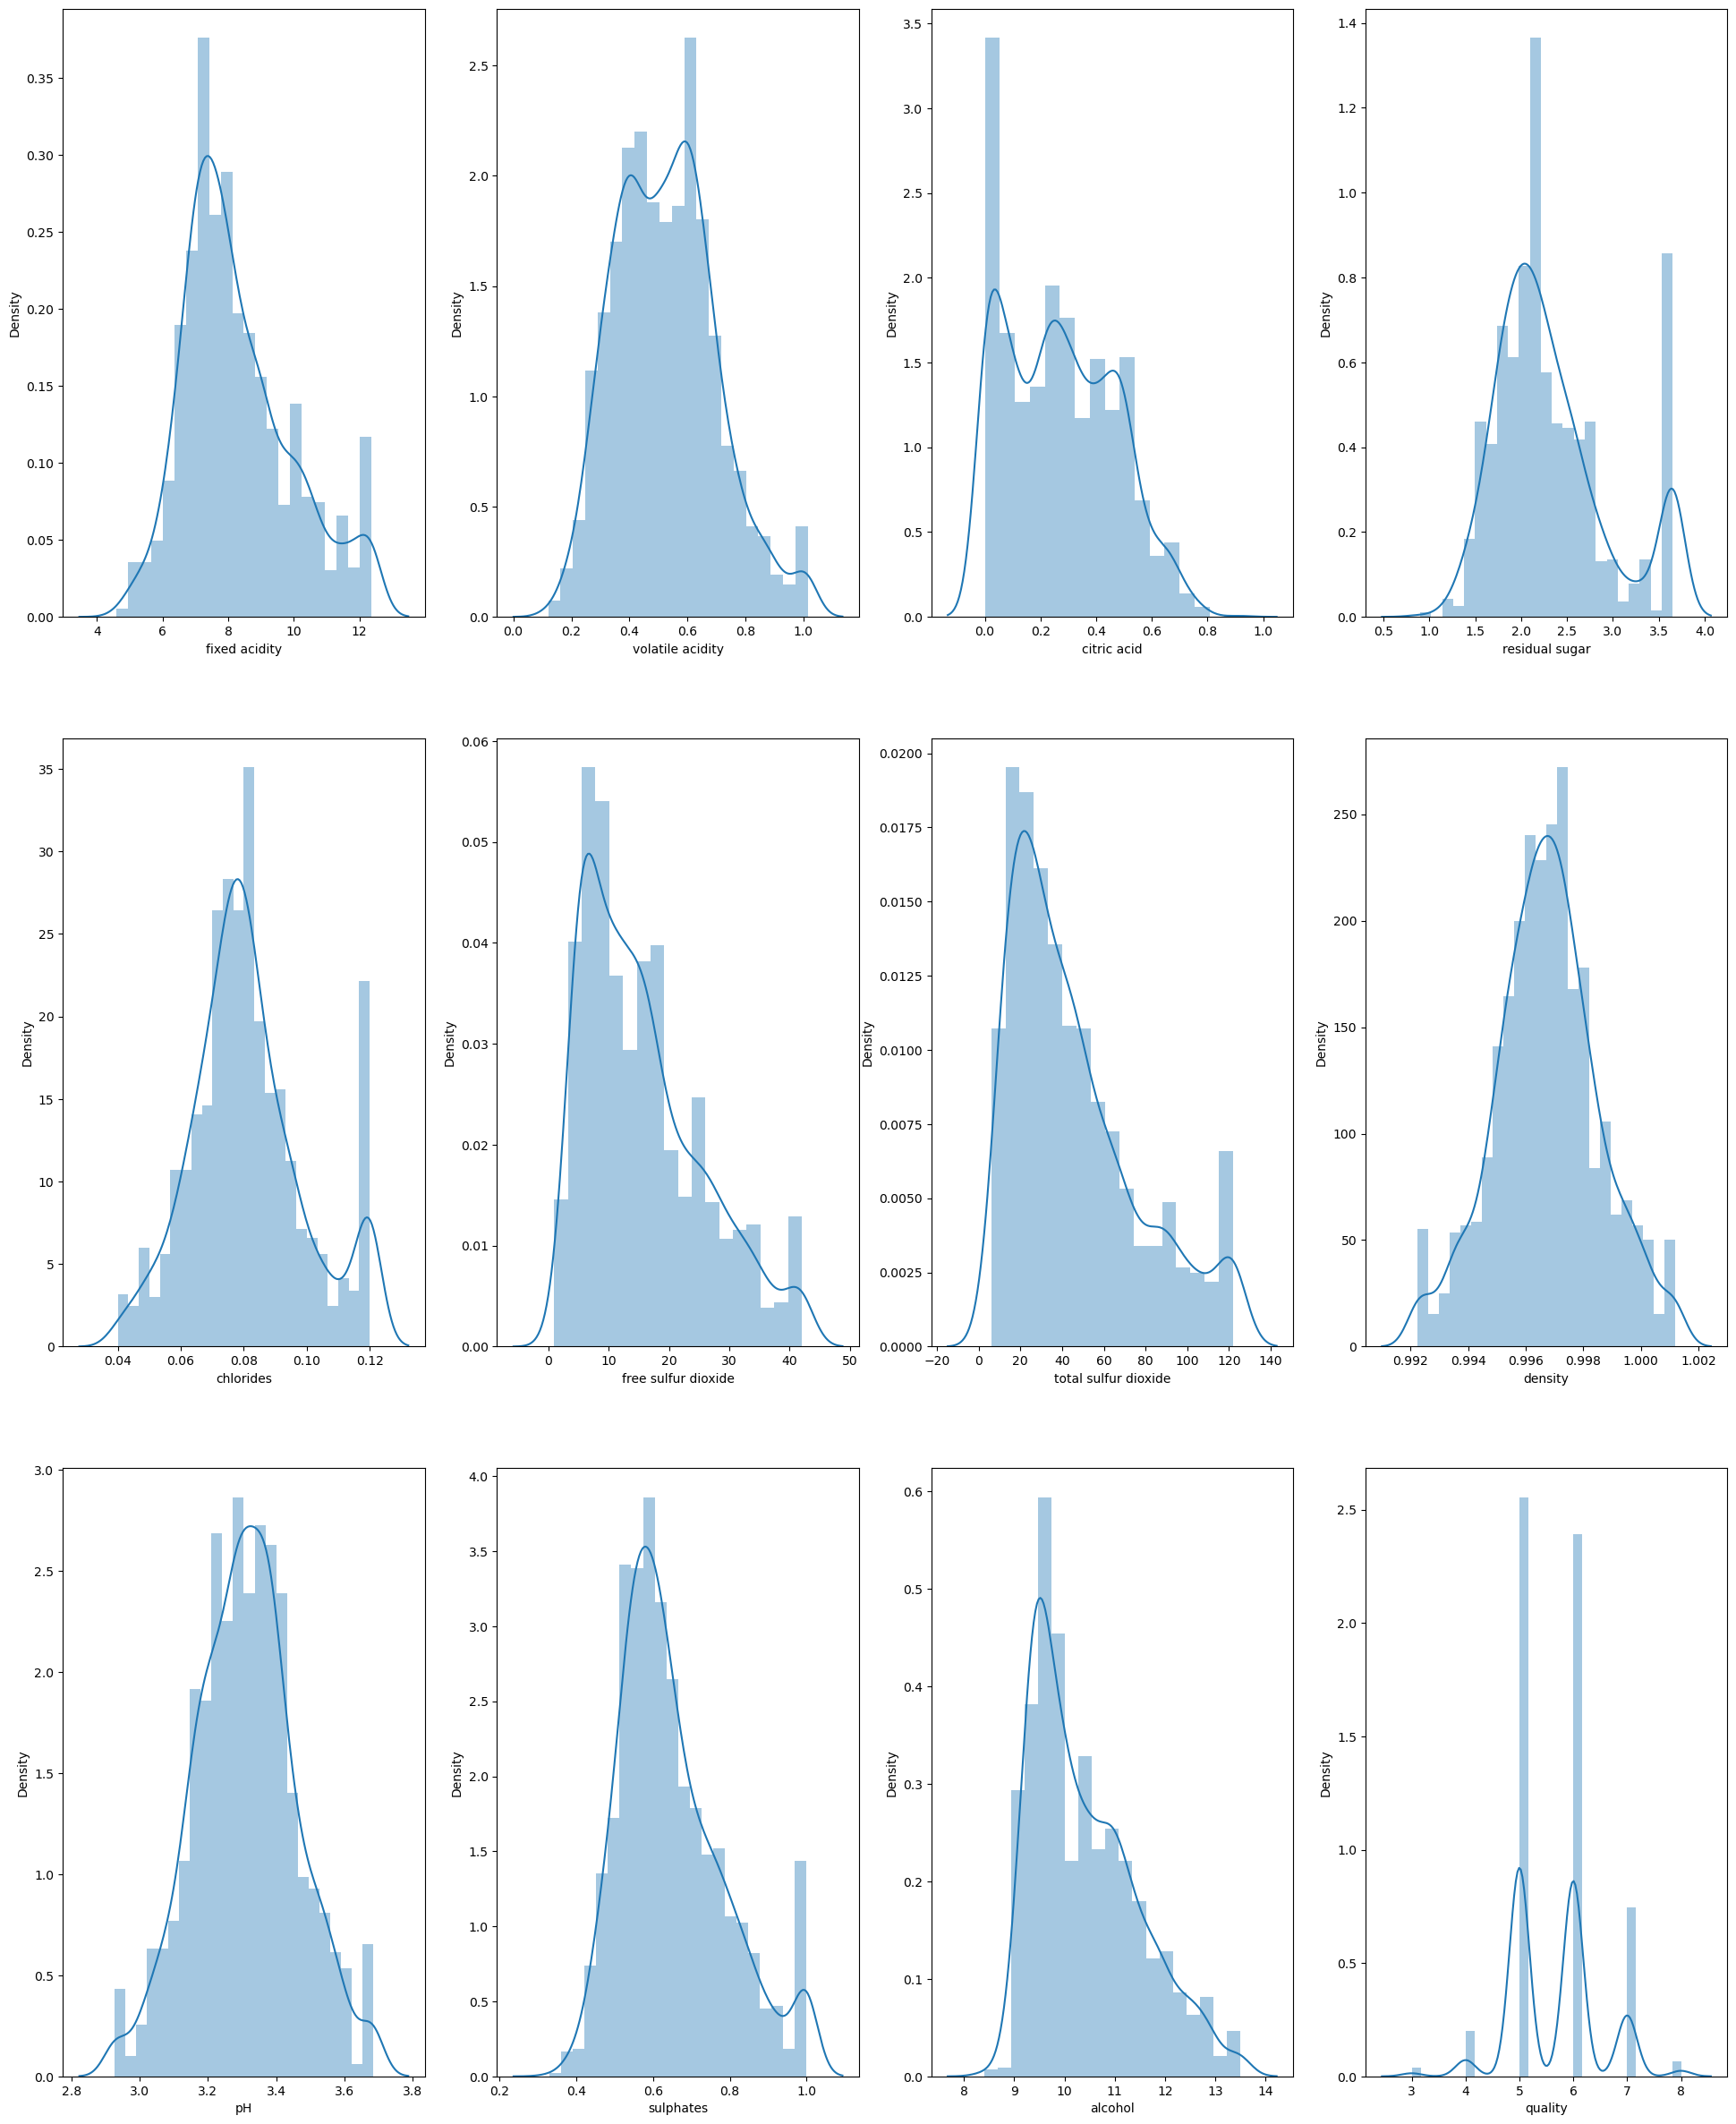

In [29]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(dataset.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

As we can see, after we remove some outliers most of our variables now follows a normal distribution, but still have some variables, like free sulfur dioxide, total sulfur dioxide and alcohol without a normal distrivution. So let´s apply a log transformation 

In [30]:
def log_transform(column):
    return np.log(column[0])

In [31]:
dataset["free sulfur dioxide"] = dataset[["free sulfur dioxide"]].apply(log_transform, axis =1)
dataset['total sulfur dioxide'] = dataset[['total sulfur dioxide']].apply(log_transform, axis=1)
dataset['alcohol'] = dataset[['alcohol']].apply(log_transform, axis=1)

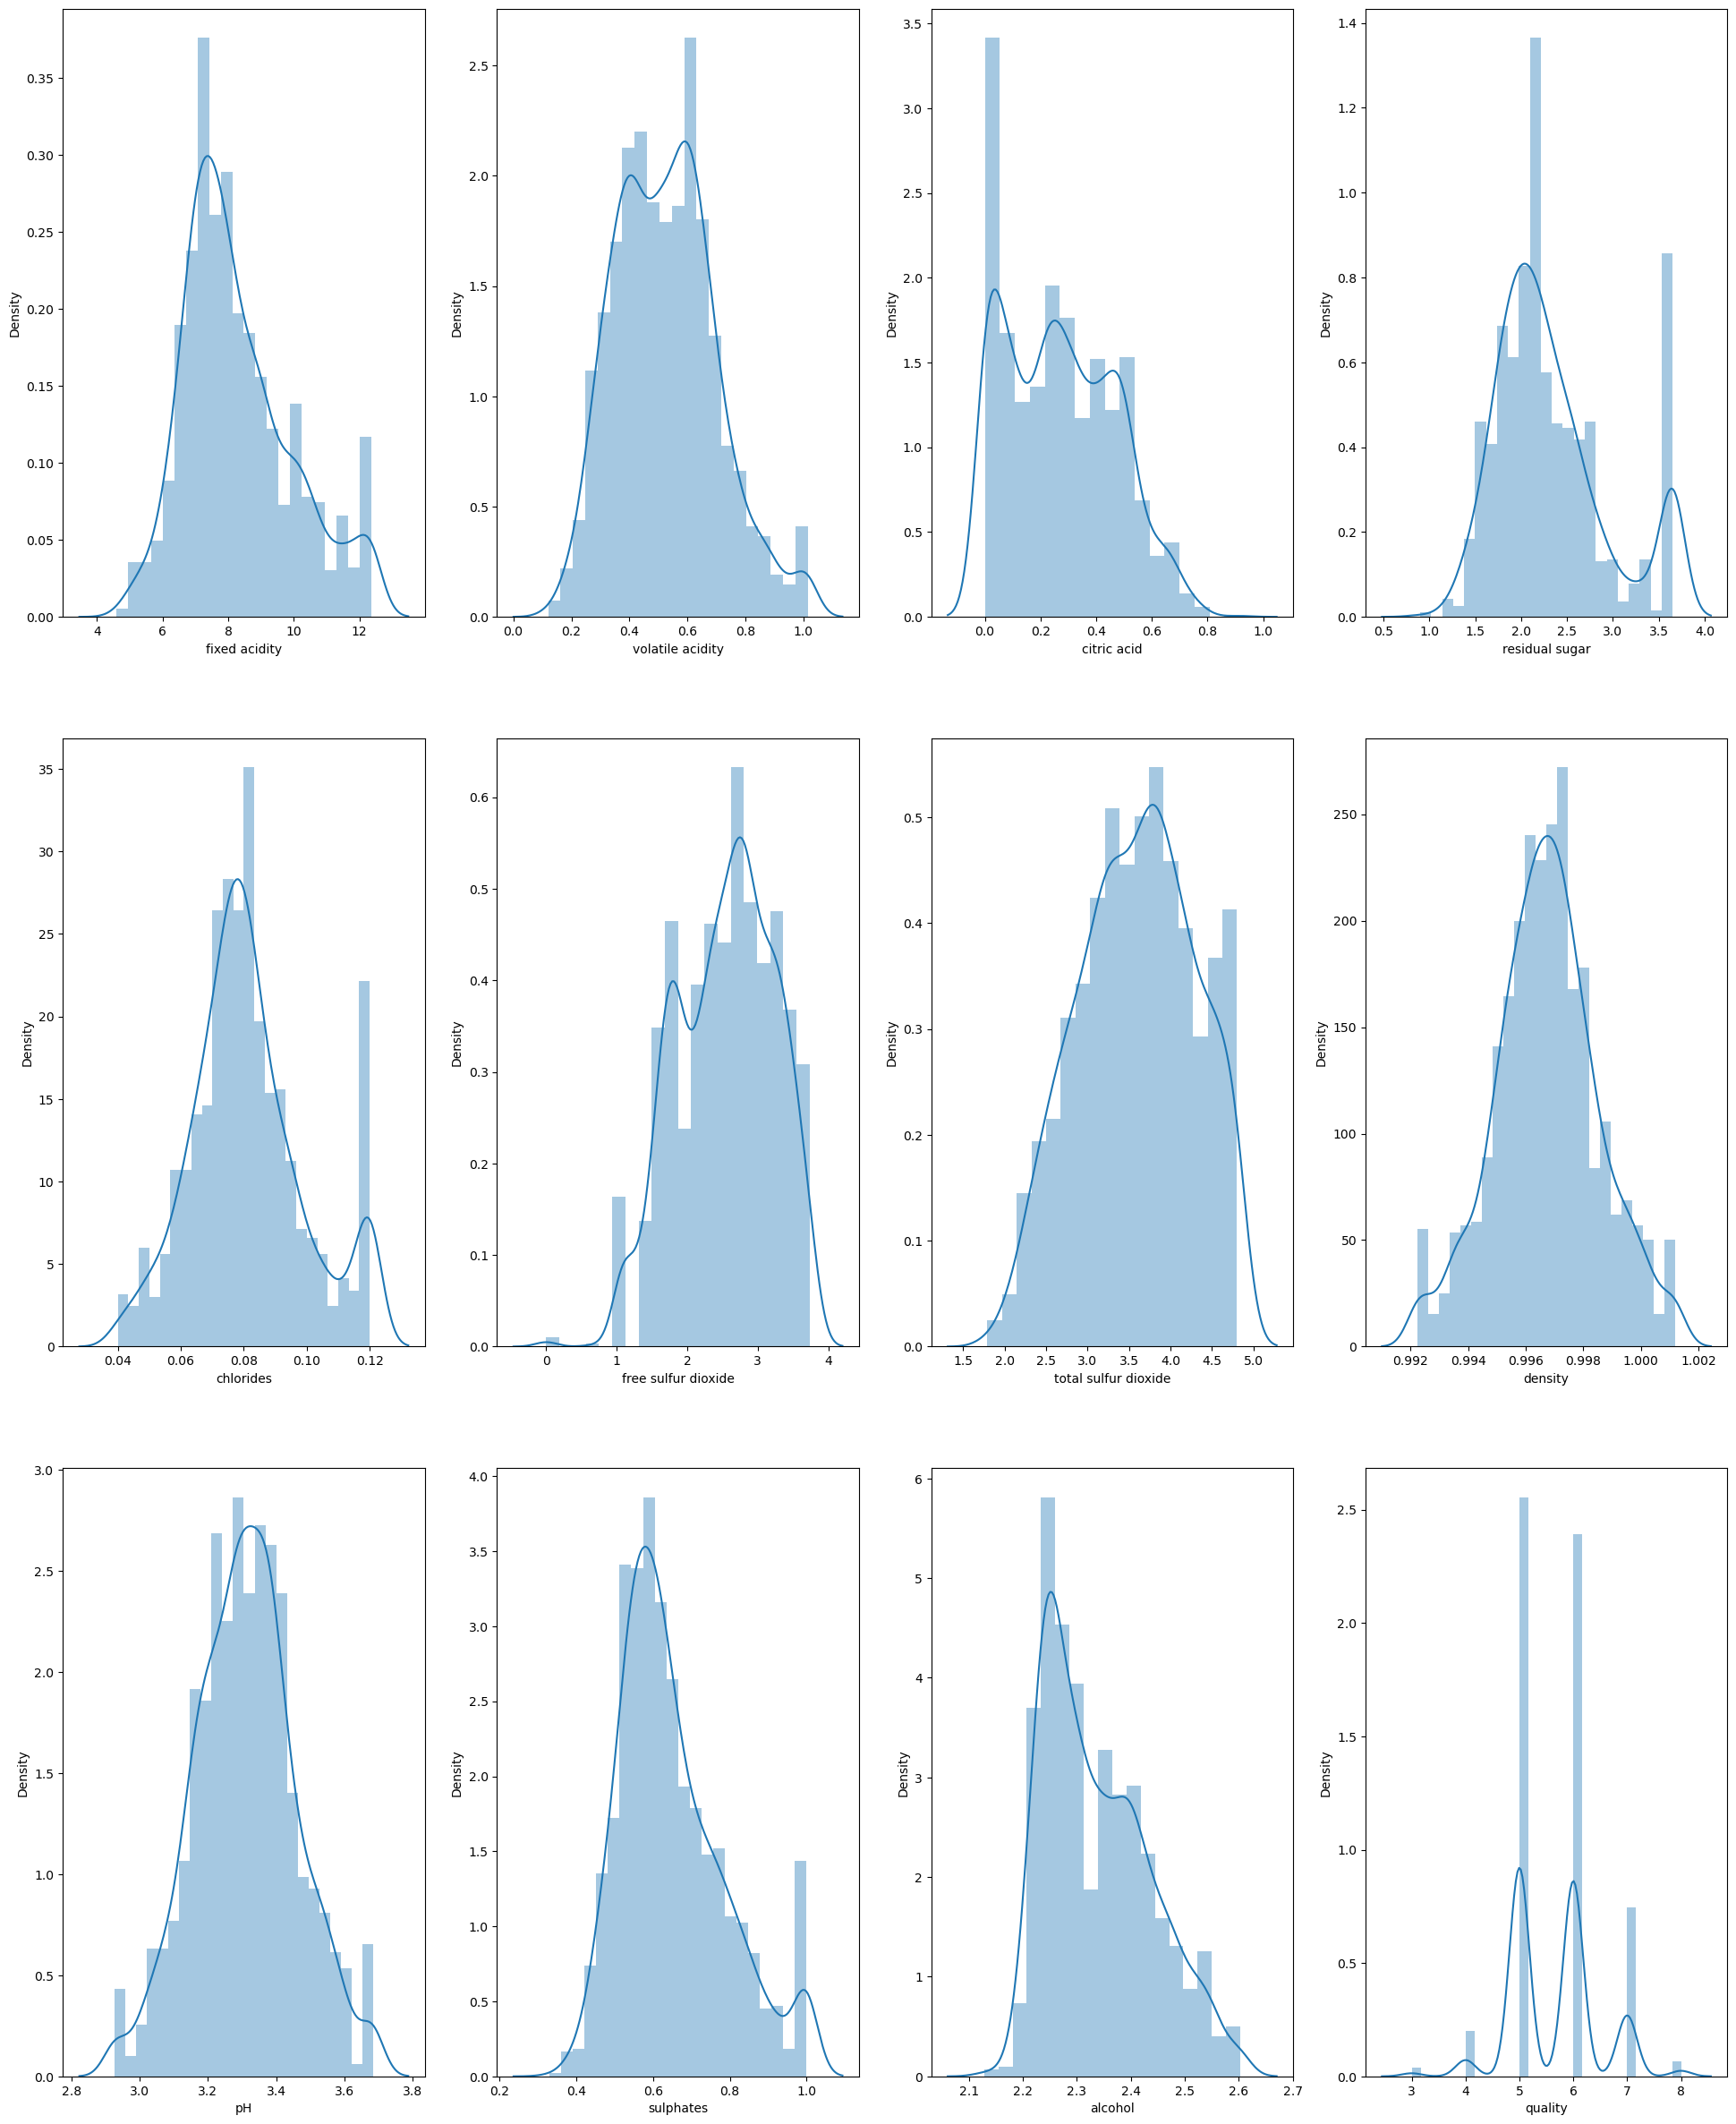

In [32]:
fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(dataset.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(dataset[columns[k]], ax = ax1[i][j])
            k += 1
plt.show()

Now all variables appears to follow aproximadely a normal distribution

## 2.3. Dealing With Imbalanced Data

As we see before, in the topic 2.1., we are dealing with a unbanlaced data, so we need to fix that.

We can apply two methods, Oversampling or Undersamling.

Oversampling involves creating synthetic examples of the minority class to balance the class distribution.

Undersampling involves reducing the number of observations in the majority class to balance the class distribution. This technique randomly removes examples from the majority class until the class distribution is balanced. This can be problematic because it can lead to the loss of important information from the majority class.

### 2.3.1. Smote Method

SMOTE stands for Synthetic Minority Over-sampling Technique, which is a method used in machine learning to deal with imbalanced datasets. The SMOTE algorithm creates synthetic data points for the minority class by taking the feature space of each minority class sample and introducing synthetic examples along the line segments that join them. This can help to balance the class distribution in the dataset.

The basic idea of SMOTE is to oversample the minority class by creating synthetic samples rather than by replicating existing samples. To do this, SMOTE selects one sample from the minority class at a time and computes the k-nearest neighbors for this sample. Then, synthetic samples are generated by interpolating between the selected sample and its k-nearest neighbors. This process continues until the desired balance between classes is achieved.

In [33]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,final quality
0,7.4,0.70,0.00,1.9,0.076,2.397895,3.526361,0.9978,3.51,0.56,2.240710,5,bad
1,7.8,0.88,0.00,2.6,0.098,3.218876,4.204693,0.9968,3.20,0.68,2.282382,5,bad
2,7.8,0.76,0.04,2.3,0.092,2.708050,3.988984,0.9970,3.26,0.65,2.282382,5,bad
3,11.2,0.28,0.56,1.9,0.075,2.833213,4.094345,0.9980,3.16,0.58,2.282382,6,bad
4,7.4,0.70,0.00,1.9,0.076,2.397895,3.526361,0.9978,3.51,0.56,2.240710,5,bad


In [34]:
dataset.drop(columns={"quality"}, inplace=True)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,final quality
0,7.4,0.70,0.00,1.9,0.076,2.397895,3.526361,0.9978,3.51,0.56,2.240710,bad
1,7.8,0.88,0.00,2.6,0.098,3.218876,4.204693,0.9968,3.20,0.68,2.282382,bad
2,7.8,0.76,0.04,2.3,0.092,2.708050,3.988984,0.9970,3.26,0.65,2.282382,bad
3,11.2,0.28,0.56,1.9,0.075,2.833213,4.094345,0.9980,3.16,0.58,2.282382,bad
4,7.4,0.70,0.00,1.9,0.076,2.397895,3.526361,0.9978,3.51,0.56,2.240710,bad


In [35]:
dataset["final quality"].value_counts()

bad     1382
good     217
Name: final quality, dtype: int64

In [36]:
count_class_0, count_class_1 = dataset["final quality"].value_counts()
dataset_bad = dataset[dataset["final quality"]== "bad"]
dataset_good = dataset[dataset["final quality"]== "good"]

In [37]:
count_class_0, count_class_1

(1382, 217)

In [38]:
dataset_bad.shape

(1382, 12)

In [39]:
dataset_good.shape

(217, 12)

In [40]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [41]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,2.397895,3.526361,0.99780,3.51,0.56,2.240710
1,7.8,0.880,0.00,2.6,0.098,3.218876,4.204693,0.99680,3.20,0.68,2.282382
2,7.8,0.760,0.04,2.3,0.092,2.708050,3.988984,0.99700,3.26,0.65,2.282382
3,11.2,0.280,0.56,1.9,0.075,2.833213,4.094345,0.99800,3.16,0.58,2.282382
4,7.4,0.700,0.00,1.9,0.076,2.397895,3.526361,0.99780,3.51,0.56,2.240710
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,3.465736,3.784190,0.99490,3.45,0.58,2.351375
1595,5.9,0.550,0.10,2.2,0.062,3.663562,3.931826,0.99512,3.52,0.76,2.415914
1596,6.3,0.510,0.13,2.3,0.076,3.367296,3.688879,0.99574,3.42,0.75,2.397895
1597,5.9,0.645,0.12,2.0,0.075,3.465736,3.784190,0.99547,3.57,0.71,2.322388


In [42]:
y.value_counts()

bad     1382
good     217
Name: final quality, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X,y)

In [45]:
y_sm.value_counts()

bad     1382
good    1382
Name: final quality, dtype: int64

## 2.4. Encoding Categorical Data

Encoding categorical data is the process of converting categorical variables into numerical variables that can be used for machine learning algorithms. Categorical variables are variables that take on a limited number of discrete values, such as colors or types of fruits. Machine learning algorithms typically require numerical input data, so encoding categorical data is necessary to use these variables in a model.

In [46]:
X = X_sm.values

In [47]:
y = y_sm.values

So our categorical data are in the "final quality" column, then let´s encode this data by applying label encode, where good = 1 and bad = 0

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
y = le.fit_transform(y_sm)
print(y)

[0 0 0 ... 1 1 1]


In [50]:
X

array([[ 7.4       ,  0.7       ,  0.        , ...,  3.51      ,
         0.56      ,  2.24070969],
       [ 7.8       ,  0.88      ,  0.        , ...,  3.2       ,
         0.68      ,  2.28238239],
       [ 7.8       ,  0.76      ,  0.04      , ...,  3.26      ,
         0.65      ,  2.28238239],
       ...,
       [11.7588102 ,  0.4457323 ,  0.55985128, ...,  2.98228258,
         0.72823796,  2.31589594],
       [ 7.2       ,  0.36      ,  0.46      , ...,  3.4       ,
         0.85      ,  2.39789527],
       [ 9.10910541,  0.29182108,  0.33546324, ...,  3.25635784,
         0.84227635,  2.45719213]])

In [51]:
y.shape

(2764,)

In [52]:
np.count_nonzero(y ==1)

1382

In [53]:
np.count_nonzero(y ==0)

1382

## 2.5. Splitting the Data into Train Set and Test Set

In [54]:
from sklearn.model_selection import train_test_split

Train set---80%

Test set ---20%

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1, stratify= y)

In [56]:
print(X_train)

[[ 6.6         0.68313202  0.02396662 ...  3.41743247  0.68066768
   2.47424715]
 [12.35        0.6         0.49       ...  3.25        0.74
   2.4765384 ]
 [ 8.2         0.44        0.24       ...  3.25        0.53
   2.32238772]
 ...
 [ 7.4         0.67        0.12       ...  3.39        0.54
   2.2512918 ]
 [ 9.1         0.68        0.11       ...  3.31        0.55
   2.2512918 ]
 [ 6.6         0.84        0.03       ...  3.52        0.56
   2.50959926]]


In [57]:
print(X_test)

[[12.35        0.28322938  0.68409793 ...  3.17577577  0.78304382
   2.34966785]
 [ 6.4         0.36        0.53       ...  3.37        0.93
   2.51769647]
 [ 9.52796128  0.28947852  0.38222747 ...  3.20554507  0.5616588
   2.42324936]
 ...
 [ 8.9         0.745       0.18       ...  3.2         0.47
   2.27212589]
 [12.16703484  0.28        0.51386212 ...  3.04204151  0.82226242
   2.28768961]
 [ 7.1         0.56        0.14       ...  3.27        0.62
   2.2300144 ]]


In [58]:
print(y_train)

[1 0 0 ... 0 0 1]


In [59]:
print(y_test)

[1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0
 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1
 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 

In [60]:
np.count_nonzero(y_train == 1)

1105

In [61]:
np.count_nonzero(y_train == 0)

1106

In [62]:
np.count_nonzero(y_test == 1)

277

In [63]:
np.count_nonzero(y_test == 0)

276

## 2.6. Feature Scaling

Feature scaling is the process of transforming variables or features of different scales to a standard scale in order to make them comparable. This is often done in machine learning and data analysis to improve the performance of algorithms that rely on distance calculations, such as clustering, principal component analysis (PCA), and gradient descent-based optimization.

We should perform feature scaling because many machine learning algorithms are based on the assumption that all features have the same scale or are normalized, and that one feature is not more important than another. When features have different scales, some features may dominate others in their effect on the outcome. Feature scaling helps to bring all features to a similar scale, making the model more reliable and accurate. It also improves the speed and performance of the machine learning algorithm.

The most common methods of feature scaling are normalization and standardization. Normalization rescales the values to a range of 0 to 1, while standardization transforms the values to have zero mean and unit variance. Both methods can help to reduce the impact of variables with large values on the overall analysis, and make the analysis more reliable and interpretable.

In [64]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,2.542339,3.595518,0.996742,3.310353,0.649831,2.338778
std,1.655860,0.174045,0.194614,0.609493,0.017822,0.677833,0.695301,0.001806,0.149851,0.137086,0.098189
min,4.600000,0.120000,0.000000,0.900000,0.040000,0.000000,1.791759,0.992248,2.925000,0.330000,2.128232
25%,7.100000,0.390000,0.090000,1.900000,0.070000,1.945910,3.091042,0.995600,3.210000,0.550000,2.251292
50%,7.900000,0.520000,0.260000,2.200000,0.079000,2.639057,3.637586,0.996750,3.310000,0.620000,2.322388
75%,9.200000,0.640000,0.420000,2.600000,0.090000,3.044522,4.127134,0.997835,3.400000,0.730000,2.406945
max,12.350000,1.015000,0.915000,3.650000,0.120000,3.737670,4.804021,1.001187,3.685000,1.000000,2.602690


Analysing the above data we can see that our features are in different´s scales (see min and max values of each feature/variabel)

__Methods:__

Normalization and standardization are two popular techniques for feature scaling, which are used to scale the values of features or variables in a dataset to comparable scales.

Normalization, also called min-max scaling, transforms the data so that it falls within a specific range. The most common range is [0, 1], but other ranges can be used as well. This is done by subtracting the minimum value from each observation and dividing it by the range (i.e., the difference between the maximum and minimum values).

Standardization, on the other hand, transforms the data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean from each observation and dividing it by the standard deviation.

Standardization (also known as z-score normalization) is typically used when the distribution of the data is not normal or when we want to remove the effect of outliers on the data. It transforms the data to have a mean of 0 and a standard deviation of 1, which makes the data more comparable and easier to interpret.

Normalization (also known as min-max scaling) is typically used when we want to compare variables that have different units or scales, or when we want to scale the data to a specific range. It transforms the data to a range of 0 to 1, where the minimum value of the variable is transformed to 0 and the maximum value is transformed to 1.

Both standardization and normalization can be used with linear regression, depending on the specific situation and the distribution of the data.

Both normalization and standardization are important preprocessing steps in machine learning, as they can improve the performance of many algorithms and make the interpretation of the results easier.

### 3.6.1. Standardization

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
print(X_train)

[[-1.08126288  1.21035762 -1.4657031  ...  0.8045835  -0.05209233
   0.90234585]
 [ 2.28535676  0.72580118  0.93760742 ... -0.36049171  0.39022821
   0.92472447]
 [-0.14446437 -0.20680015 -0.3516299  ... -0.36049171 -1.17531497
  -0.58086606]
 ...
 [-0.61286362  1.13381426 -0.97046381 ...  0.61369523 -1.10076529
  -1.27526031]
 [ 0.38248479  1.19210184 -1.02203331 ...  0.05701698 -1.02621562
  -1.27526031]
 [-1.08126288  2.12470317 -1.43458925 ...  1.51829738 -0.95166594
   1.24763009]]


In [68]:
print(X_test)

[[ 2.28535676 -1.12057821  1.93856061 ... -0.87697939  0.71111846
  -0.3144209 ]
 [-1.19836269 -0.67310081  1.14388539 ...  0.47452566  1.80667203
   1.32671559]
 [ 0.63305573 -1.08415345  0.38182992 ... -0.66983037 -0.93929963
   0.40425014]
 ...
 [ 0.26538498  1.57097113 -0.66104686 ... -0.70841562 -1.62261302
  -1.07177367]
 [ 2.17823083 -1.13940148  1.06066316 ... -1.8075663   1.00349185
  -0.91976264]
 [-0.78851334  0.49265085 -0.86732483 ... -0.22132215 -0.50436789
  -1.48307678]]


# 3. Machine Learining

In this case we are going to buil classification model´s.

Classification machine learning models are used to predict the class or category of a given observation based on its features or attributes. The goal of a classification model is to build a function that can take input data and output the class that the data belongs to. There are several types of classification models, including:

Logistic Regression: A statistical method that uses a logistic function to model a binary dependent variable.

Decision Trees: A model that uses a tree-like structure to represent the relationships between features and class labels.

Random Forest: An ensemble model that combines multiple decision trees to improve accuracy.

Naive Bayes: A probabilistic model that makes predictions based on the likelihood of each class given the input data.

Support Vector Machines (SVM): A model that finds the best boundary (hyperplane) that separates the classes.

K-Nearest Neighbors (KNN): A model that classifies new observations based on the closest k training examples in the feature space.

## 3.1. Model Building

### 3.1.1. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [74]:
# Predicting the Test set results
y_pred = logistic.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [75]:
# Making the Confusion Matrix and See the Accuracy
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       276
           1       0.79      0.84      0.82       277

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



In [107]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[213  63]
 [ 43 234]]


__K-Fold Cross Validation__

Method used to evaluate the performance of a machine learning model. The dataset is divided into K equal parts, called "folds". The model is trained K times, each time using a different fold as the validation set and the remaining folds as the training set. The performance of the model is then calculated as the average of the K validation set scores. This technique helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance on unseen data.

In [109]:
from sklearn.model_selection import cross_val_score

In [112]:
accuracies_logistic = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Accuracy: {:.2f} %".format(accuracies_logistic.mean() * 100))
print("Logistic RegressionStandard Deviation: {:.2f} %".format(accuracies_logistic.std() * 100))

Logistic Regression Accuracy: 81.64 %
Logistic RegressionStandard Deviation: 1.89 %


### 3.1.2. K-NN (K-Nearest Neighbors)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [128]:
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [129]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       276
           1       0.83      0.99      0.90       277

    accuracy                           0.89       553
   macro avg       0.91      0.89      0.89       553
weighted avg       0.91      0.89      0.89       553



In [136]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
print(cm_knn)

[[218  58]
 [  3 274]]


__K-Fold Cross Validation__

In [131]:
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("KNN Accuracy: {:.2f} %".format(accuracies_knn.mean() * 100))
print("KNN Deviation: {:.2f} %".format(accuracies_knn.std() * 100))

KNN Accuracy: 88.87 %
KNN Deviation: 2.02 %


### 3.1.3. SVM (Support Vector Machine)

In [83]:
from sklearn.svm import SVC

In [138]:
svm = SVC(kernel = "linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [139]:
# Predicting the Test set results
y_pred_svm = svm.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [140]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       276
           1       0.78      0.86      0.82       277

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



In [135]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
print(cm_svm)

[[208  68]
 [ 38 239]]


__K-Fold Cross Validation__

In [141]:
accuracies_SVM = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: {:.2f} %".format(accuracies_SVM.mean() * 100))
print("SVM Deviation: {:.2f} %".format(accuracies_SVM.std() * 100))

SVM Accuracy: 81.59 %
SVM Deviation: 2.05 %


### 3.1.4. Kernel SVM

In [88]:
kernel = SVC(kernel = "rbf")
kernel.fit(X_train,y_train)

SVC()

In [89]:
# Predicting the Test set results
y_pred_kernel = svm.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_kernel.reshape(len(y_pred_kernel),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [90]:
print(classification_report(y_test,y_pred_kernel))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       276
           1       0.78      0.86      0.82       277

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



In [144]:
cm_kernel = confusion_matrix(y_test,y_pred_kernel)
print(cm_kernel)

[[208  68]
 [ 38 239]]


__K-Fold Cross Validation__

In [143]:
accuracies_kernel_SVM = cross_val_score(estimator = kernel, X = X_train, y = y_train, cv = 10)
print("Kernel SVM Accuracy: {:.2f} %".format(accuracies_kernel_SVM.mean() * 100))
print("Kernel SVM Deviation: {:.2f} %".format(accuracies_kernel_SVM.std() * 100))

Kernel SVM Accuracy: 88.83 %
Kernel SVM Deviation: 1.02 %


### 3.1.5. Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [94]:
# Predicting the Test set results
y_pred_NB = NB.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [95]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       276
           1       0.77      0.84      0.80       277

    accuracy                           0.79       553
   macro avg       0.79      0.79      0.79       553
weighted avg       0.79      0.79      0.79       553



In [145]:
# Making the Confusion Matrix and See the Accuracy
cm_NB = confusion_matrix(y_test,y_pred_NB)
print(cm_NB)

[[205  71]
 [ 44 233]]


__K-Fold Cross Validation__

In [150]:
accuracies_NB = cross_val_score(estimator = NB, X = X_train, y = y_train, cv = 10)
print("NB Accuracy: {:.2f} %".format(accuracies_NB.mean() * 100))
print("NB Standard Deviation: {:.2f} %".format(accuracies_NB.std() * 100))

NB Accuracy: 80.60 %
NB Standard Deviation: 2.26 %


### 3.1.6. Decision Trees

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [99]:
# Predicting the Test set results
y_pred_tree = tree.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_tree.reshape(len(y_pred_tree),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [0 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [100]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       276
           1       0.86      0.92      0.89       277

    accuracy                           0.89       553
   macro avg       0.89      0.89      0.89       553
weighted avg       0.89      0.89      0.89       553



In [148]:
cm_tree = confusion_matrix(y_test,y_pred_tree)
print(cm_tree)

[[236  40]
 [ 23 254]]


__K-Fold Cross Validation__

In [149]:
accuracies_tree = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Decision Trees Accuracy: {:.2f} %".format(accuracies_tree.mean() * 100))
print("Decision Trees Standard Deviation: {:.2f} %".format(accuracies_tree.std() * 100))

Decision Trees Accuracy: 90.05 %
Decision Trees Standard Deviation: 1.64 %


### 3.1.7. Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
forest = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [104]:
# Predicting the Test set results
y_pred_forest = forest.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_forest.reshape(len(y_pred_forest),1), y_test.reshape(len(y_test),1)), axis=1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [105]:
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       276
           1       0.91      0.96      0.94       277

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



In [151]:
cm_forest = confusion_matrix(y_test,y_pred_forest)
print(cm_forest)

[[249  27]
 [ 10 267]]


__K-Fold Cross Validation__

In [152]:
accuracies_forest = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 10)
print("Random Forest Accuracy: {:.2f} %".format(accuracies_forest.mean() * 100))
print("Random Forest Standard Deviation: {:.2f} %".format(accuracies_forest.std() * 100))

Random Forest Accuracy: 94.07 %
Random Forest Standard Deviation: 1.32 %


This classification report and confusion matrix indicate that your model has high precision, recall, and F1-score for both classes, indicating good overall performance. The accuracy of 0.94 is also high, which suggests that the model is making accurate predictions on the test set.

Looking at the confusion matrix, there are some false negatives and false positives, but the numbers are relatively low, which suggests that the model is doing a good job of distinguishing between the two classes. Overall, these results suggest that the model is performing well and is a good candidate for deployment.

## 3.2. Hyperparameters Tunning

As we see before the random forest model was the best one. This model achieved a accuracy of 94.07% by applying k-Fold Cross Validation. So let´s apply hyperparameter tunning to this model to see if we can further improve the model's performance. Hyperparameter tuning can help find the optimal values for the hyperparameters of the model, which can result in better performance on new, unseen data.

### 3.2.1. Grid Search 

Grid search is a technique used in machine learning to tune hyperparameters of a model. Hyperparameters are parameters that cannot be learned from training data, such as the regularization parameter of a logistic regression model or the depth of a decision tree. Grid search involves defining a grid of possible values for each hyperparameter, and then training and evaluating the model for each combination of hyperparameter values in the grid. The combination that yields the best performance, as measured by a chosen evaluation metric, is then selected as the optimal hyperparameter values for the model.

It can reduce overfiting

In [154]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# create a GridSearchCV object
grid_search = GridSearchCV(forest, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy Score: {:.2f}%".format(best_score * 100))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 94.21%


So the best Random Forest Model has a accuracy of 94.21% and the following parameters: 'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200

# 4. Conclusions

In conclusion, this project aimed to develop a predictive model for wine quality using its physiochemical properties, with alcohol content being the most influential factor. The random forest model built in this project achieved a high accuracy of 94.21% in predicting wine quality based on the dataset of wine samples.

This model can have practical applications in the wine industry and benefit both winemakers and consumers. Winemakers can use it to predict the quality of their wines and make informed decisions about production and blending, while consumers can make informed decisions when purchasing wines based on their predicted quality.

However, it is important to validate the model's performance on new, unseen data to ensure its generalizability before implementing it in practical applications. Furthermore, there may be additional factors that influence wine quality beyond the scope of the physiochemical properties considered in this project, which could be explored in future research.

Overall, this project demonstrates the potential of machine learning and predictive modeling in the wine industry and highlights the importance of understanding the underlying factors that influence wine quality.